In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

***Reading in the data***

In [103]:
df_calendar = pd.read_csv('./calendar.csv')
df_listings = pd.read_csv('./listings.csv')
df_reviews = pd.read_csv('./reviews.csv')

***Visualizing the data***

In [104]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [119]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [151]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


***Checking the percentage of nulls***

In [105]:
df_calendar['price'].isnull().mean()

0.32938998399793334

In [107]:
df_calendar.shape

(1393570, 4)

***Checking for unique values***

In [108]:
len(pd.unique(df_calendar['listing_id']))

3818

In [117]:
df_listings.shape

(3818, 92)

In [109]:
df_calendar['price'][0]

'$85.00'

***Drop Nan rows***

In [111]:
df_calendar_dropna = df_calendar.dropna(subset=['price'], how='any')

***Convert Price to float***

In [112]:
df_calendar_dropna['price'] = df_calendar_dropna['price'].apply(lambda x: float(x.replace('$','').replace(',','')))

/var/folders/qz/6vwxy__j4jv671j87ggt5prm0000gn/T/ipykernel_4775/265971480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar_dropna['price'] = df_calendar_dropna['price'].apply(lambda x: float(x.replace('$','').replace(',','')))


***Aggregate listings by mean price***

In [113]:
df4 = df_calendar_dropna.groupby('listing_id').agg({'price':'mean' })

In [114]:
df4.shape

(3723, 1)

In [115]:
df4.head()

,price
listing_id,
3335,120.000000
4291,82.000000
5682,53.944984
6606,92.849315
7369,85.000000


***Check for Nan Values***

In [121]:
df_listings[['review_scores_rating']].isnull().mean()

review_scores_rating    0.16946
dtype: float64

***Drop Nans and select required columns***

In [122]:
df5 = df_listings.dropna(subset='review_scores_rating')

In [123]:
df6 = df5[['id','review_scores_rating']]

***Merge listings dataset with calendar dataset***

In [124]:
inner_merged_df7 = pd.merge(df4, df6, left_on='listing_id', right_on='id')

In [125]:
inner_merged_df7.shape

(3101, 3)

In [126]:
inner_merged_df7.head()

,price,id,review_scores_rating
0,82.000000,4291,92.0
1,53.944984,5682,96.0
2,92.849315,6606,93.0
3,85.000000,7369,94.0
4,85.616438,9419,91.0


***Plot your data***

<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

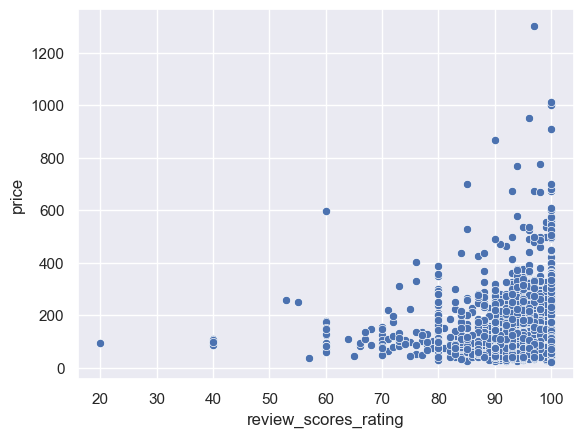

In [128]:
sns.scatterplot(x="review_scores_rating", y="price", data=inner_merged_df7)

***Calculate correlation coefficient***

In [129]:

stats.pearsonr(inner_merged_df7['review_scores_rating'], inner_merged_df7['price'])

PearsonRResult(statistic=0.06487541572111183, pvalue=0.00030029563280570363)

In [135]:
df_listings['review_scores_cleanliness'].head()

0    10.0
1    10.0
2    10.0
3     NaN
4     9.0
Name: review_scores_cleanliness, dtype: float64

***Get number of unique values***

In [137]:
len(pd.unique(df_listings['zipcode']))

29

In [152]:
len(pd.unique(df_listings['street']))

1442

***Get percentage of nulls***

In [141]:
df_listings[['zipcode']].isnull().mean()

zipcode    0.001833
dtype: float64

***Drop Nans and select required columns***

In [142]:
df11 = df_listings.dropna(subset='zipcode')

In [143]:
df12 = df11[['id','zipcode']]

***Merge datasets***

In [144]:
inner_merged_df13 = pd.merge(df4, df12, left_on='listing_id', right_on='id')

***Group zipcodes by average prices and sort in descending order***

In [145]:
df14 = inner_merged_df13.groupby('zipcode').agg({'price':'mean'}).sort_values('price',ascending=False)

***Get Most Expensive zipcodes***

In [146]:
df14.head()

,price
zipcode,
98134,213.401463
98101,194.623749
98199,186.698470
98121,183.572409
98119,175.977182


***Get least expensive zipcodes***

In [147]:
df14.tail()

,price
zipcode,
98125,91.957781
98133,89.064697
98106,86.692376
98108,86.681967
99\n98122,67.000000


***Group zipcodes by mean cleanliness scores***

In [148]:
df15 = df11.groupby('zipcode').agg({'review_scores_cleanliness':'mean'}).sort_values('review_scores_cleanliness',ascending=False)

***Get cleanest zipcodes***

In [149]:
df15.head()

,review_scores_cleanliness
zipcode,
98116,9.788889
98178,9.750000
98126,9.744681
98119,9.739496
98177,9.733333


***Get least clean zipcodes***

In [150]:
df15.tail()

,review_scores_cleanliness
zipcode,
98104,9.474359
98102,9.441176
98133,9.342857
98105,9.234286
99\n98122,8.000000
